In [1]:
### template for notebook
### this will need to be included for all examples
%matplotlib notebook
### %matplotlib inline (is another alternative)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display


# Classifying Iris Species - Briefing

We've been collecting data on the measurements of irises, and we handily have the measurements from a botanist as to measurements belonging to three species _setosa_ , _versicolor_ or _virginica_.

Using the botanists measurements we can identify our species based on the measurements we've taken.

This is a *classification* problem. Every iris belongs to possibly one of three classes, a so called three-class classification problem.

The aim is for each single data point (iris) is to find out the species of the flower. The species it belongs to is called it's _label_.

## Origin of the dataset

[British statistician and biologist Ronald Fisher in his 1936 paper _The use of multiple measurements in taxonomic problems_ ](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

## We want to find out what's available in the data set
Let's find out by looking at the keys. You should be away that the type is a Bunch, which is similar to a dictionary key. Therefore you can check for the keys.


In [3]:
print(type(iris_dataset))
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

<class 'sklearn.utils.Bunch'>
Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


## Look at the description of the data.

In [4]:
print(iris_dataset['DESCR'] + "\nEND\n____")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

### The species = target_names

In [5]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


### The feature_names are the column names

In [6]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Data is stored in 'data' (unsurprisingly)

It's stored in a numpy array.

In [7]:
print("target type:  {}".format(type(iris_dataset['data'])))

target type:  <class 'numpy.ndarray'>


If you ran just 

```python
print(iris_dataset['data'])
```

You would see it return all rows. You should consider the rows in this instance, as each flower. In machine learning the individual items are called **_samples_**. The properties are called **_features_**.

You can use the method shape on an ndarray, so you can see what you're working with.

In [8]:
print("Shape of data (numpy ndarray): {}".format(iris_dataset['data'].shape))

Shape of data (numpy ndarray): (150, 4)


The shape of data returned is 150 samples multiplied by the number of features. (This is a two-dimensional array)

This is a convention in scikit-learn. It will make an assumption that your data is in this shape.

### The first five rows

In [9]:
print("First five rows of data:\n{}".format(iris_dataset['data'][:5]))

First five rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


### Don't forget the 'target' key

This is another numpy ndarray. However this time it is only a one-dimensional array.

In [10]:
print("target type: {}".format(type(iris_dataset['target'])))
print("shape of data (numpy ndarray): {}".format(iris_dataset['target'].shape))

target type: <class 'numpy.ndarray'>
shape of data (numpy ndarray): (150,)


In [11]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


This might not make sense, but if you notice that target names have 3 species. These numbers represent the positions in the array returned by target_names. This means that:

* 0 = setosa
* 1 = versicolor
* 2 = virginica

# Assessing the model's performance

We need a way to assess the model's performance. Training the data requires splitting the labeled data of 150 flower measurements for the Iris example into two parts.

One part will be used to build the machine learning model which is the **training data**. And the rest of the data will be used to assess how well the model works (**test data**)

The test data is typically considered 25% of the data.

There is a function handily in scikit-learn which will split the data called.

```python
from sklearn.model_selection import train_test_split
```

When defining your variables data is represented with a capital X while labels (the outcome of the model) is represented as a y.
\begin{equation*}
f(X=y)
\end{equation*}

Because X is representing a 2 dimensional array, it is considered a matrix in mathematics, the y is lower case because it is representing a one dimensional array (or vector).



In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)


The train_test_split function will shuffle the data as well.

The random_state parameter is passed as 0 so that it is fixed and considered deterministic. (AKA, the same out comes)


In [13]:
## Training set
print ("X_train shape: {}".format(X_train.shape))
print("y_train shape: {} (remember there is no second outcome because it's a one dimensional array)".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,) (remember there is no second outcome because it's a one dimensional array)


In [14]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


# Check the data

We need to check the data so we'll convert the numpy array to a pandas dataframe.


<IPython.core.display.Javascript object>


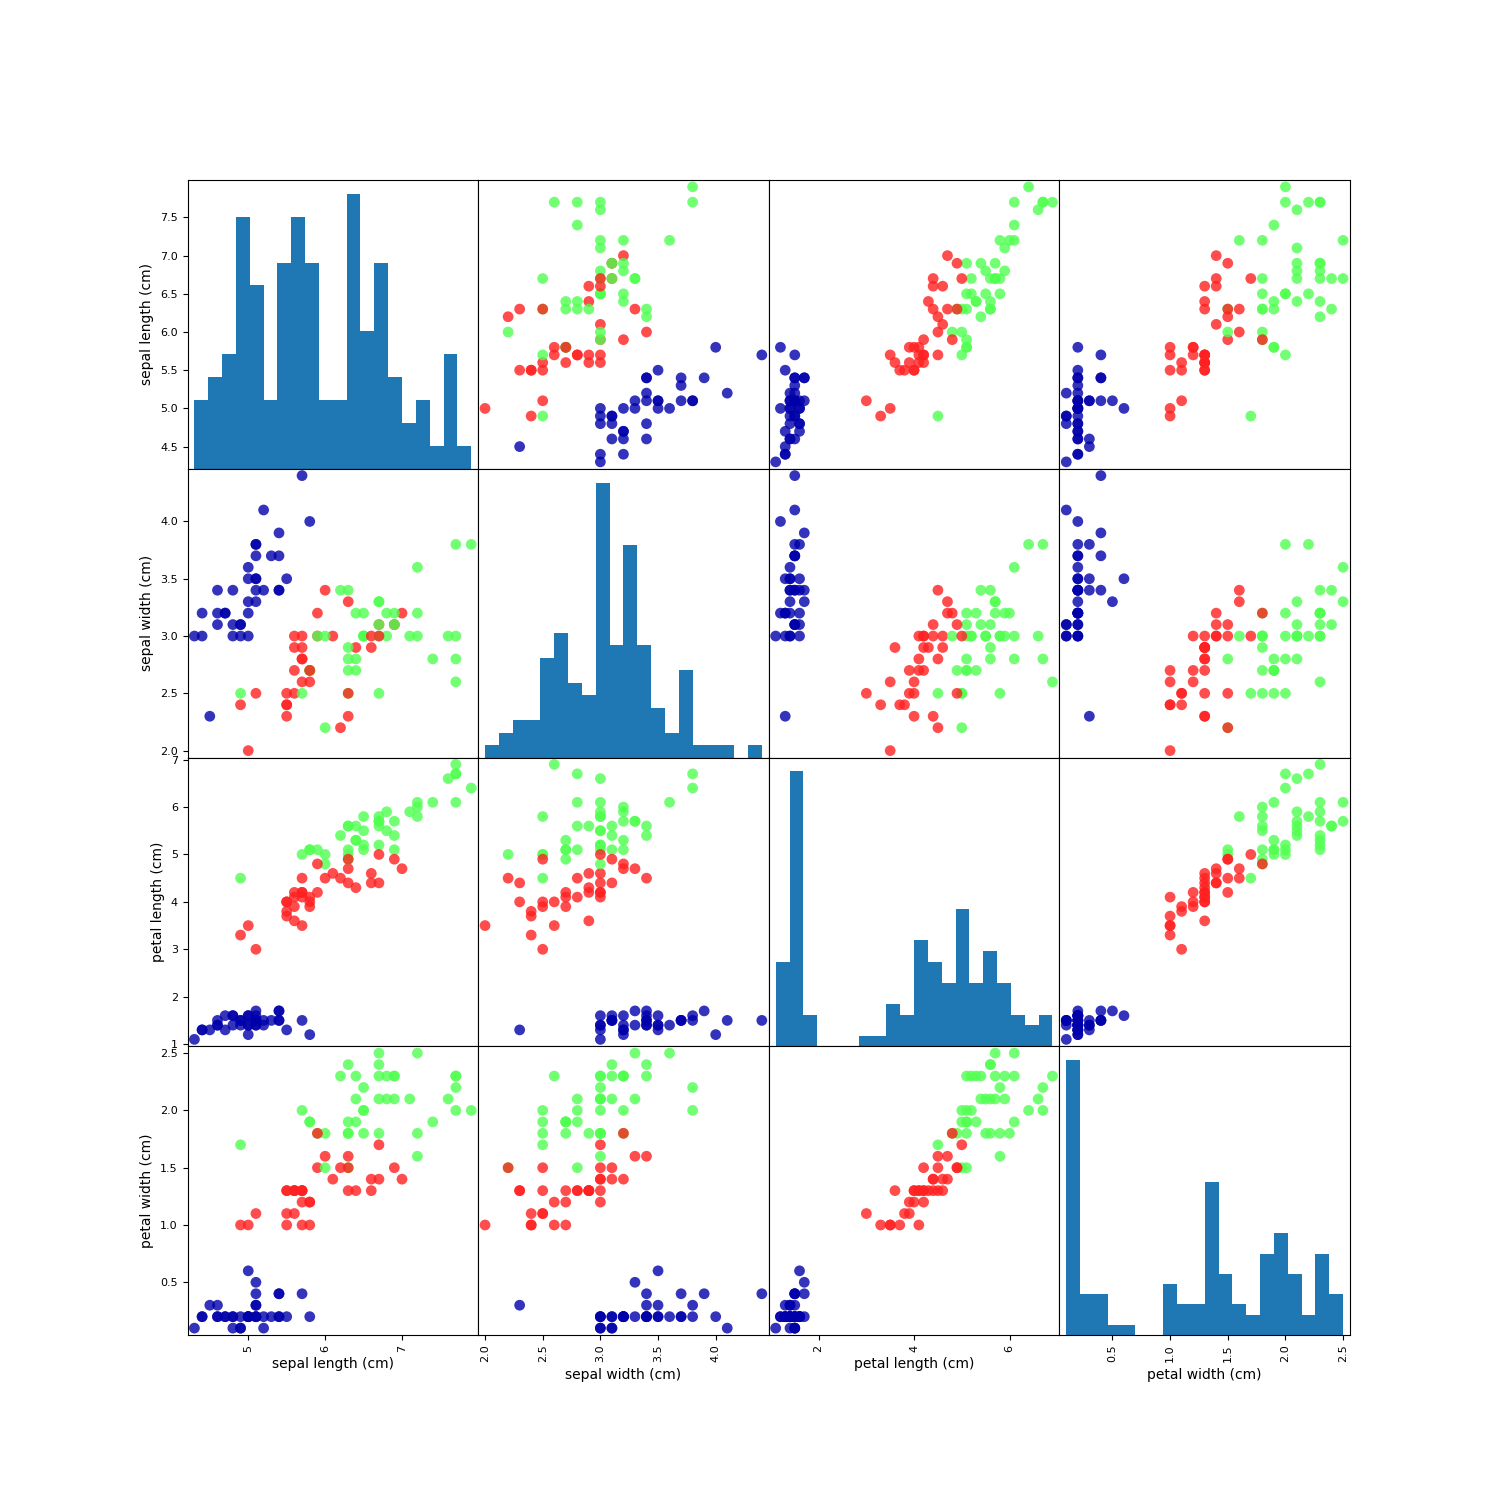

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9ce292ef0>,
      dtype=object)

In [15]:
#create a dataframe from data in X_train
# label the columns using the strings in iris_data.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatterplot matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                          marker='o', hist_kwds={'bins' : 20}, s=60,
                          alpha=.8, cmap=mglearn.cm3)

# Implement the first model

The selection for the model is is one called k-Nearest Neighbors (note the spelling is always american in programming in most programming languages, so watch out for spellings like this one!)

It's a classification algorithm in scikit-learn.

The k stands for the number of neighbours in the training set. This means that it will take into consideration the 3 nearest neighbours. If you had k set to more than 1, it would then decide which is in the majority, and assign the majority class as the prediction.

For this, it will be set to 1.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

**knn** in the above contains all the information it has extracted from the training data. The classifier stores the training set in this instance.

In the above we're only changing one of the parameters the rest will be defaults.

You then need to build the model on the training set. Passing in numpy arrays, which is X is referenced as the data (__samples__ and their __features__), and y_train is the __labels__.

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

You get output with knn.fit which shows the parameters that were ran. Aside from n_neighbors, the rest are the defaults.

## Making a prediction

We now need to test it against a new iris.

In [19]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


This was ran as a 2 dimensional array because that's what it expects in. (Don't forget the meaning behind X)

In [23]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Name of predicted target name: {}".format(
       iris_dataset['target_names'][prediction]))

Prediction: [0]
Name of predicted target name: ['setosa']


The example shows a prediction, but it's not based on the test set, so the next thing is to evaluate the model on the test data that was split earlier in the example.

# Evaluate the model

We now need to use the test set to measure the accuracy of the model. Since we know the classification of the test set is accurate, we run predictions on the test set.

In [24]:
##Label prediction
y_prediction = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_prediction))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


We can now run np.mean which will compare the y_prediction array to the y_test array for accuracy.

In [25]:
print("Test set score: {:.2f}".format(np.mean(y_prediction == y_test)))

Test set score: 0.97


Alternatively we could use the knn object's score method, which will also represent the accuracy for us.

In [26]:
## using the score method on the knn object.

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


This gives an accuracy of 97%. M